###  Матриця помилок
Точність роботи моделі за кількістю правильно зпрогнозованих даних (accuracy) у матриці помилок

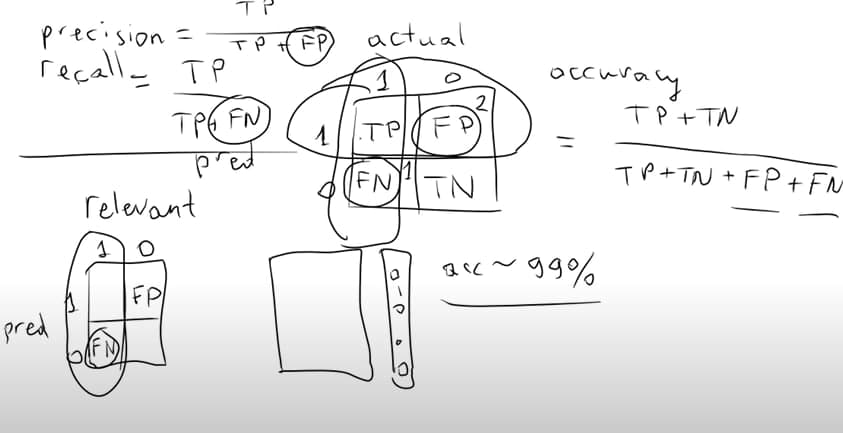
* "False Negative", "False Positive" - помилки першого та другого роду.

Как видно из рисунка выше, матрица ошибок — это комбинация вашего прогноза (1 или 0) и фактического значения (1 или 0). В зависимости от результата предсказания и того, корректна ли была проведена классификация, матрица разделена на 4 части. Например, true positive (истинно положительный) результат — это количество случаев, в которых вы правильно классифицируете семпл как положительный. А false positive (ложноположительный) — это число случаев, в которых вы ошибочно классифицируете семпл как положительный.

Матрица ошибок содержит только абсолютные числа. Однако, используя их, мы можем получить множество других метрик, основанных на процентных соотношениях. True Positive Rate (TPR) и False Positive Rate (FPR) — две из них.

True Positive Rate (TPR) показывает, какой процент среди всех positive верно предсказан моделью.
$$TPR = TP / (TP + FN).$$

False Positive Rate (FPR): какой процент среди всех negative неверно предсказан моделью.
$$FPR = FP / (FP + TN).$$

Між точністю (p) і повнотою (r) існує F-міра
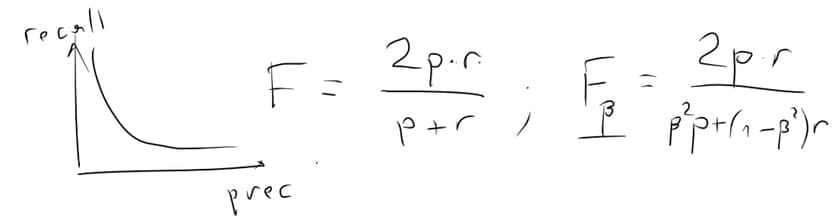
* Fb - міра при зважених p та r відносно їх важливості

### Метрика ROC AUC у задачі класифікації (TPR, FPR):

Полное название ROC — Receiver Operating Characteristic (рабочая характеристика приёмника). AUC или area under curve — это просто площадь под кривой ROC.

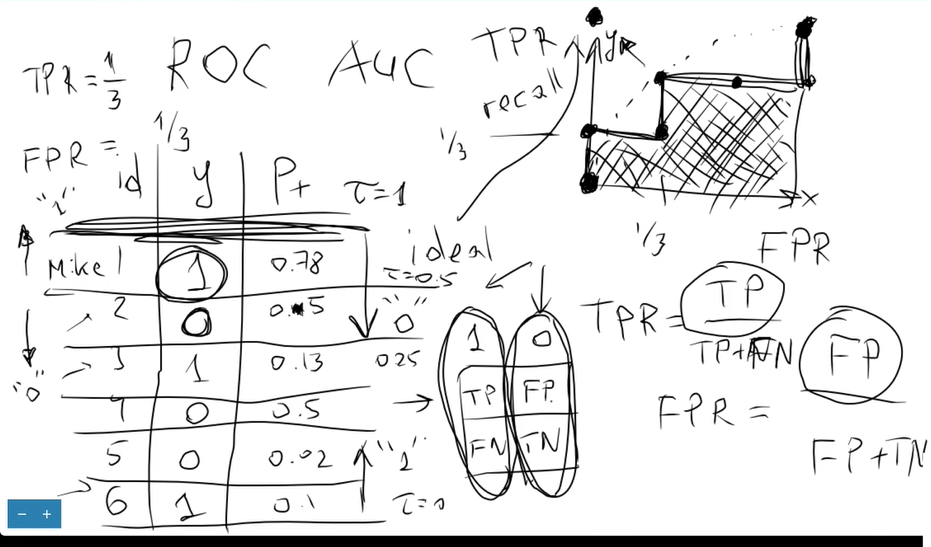
* діагональ між крайніми точками кривої ROC являє собою проміжок одинакових ймовірностей для помилкового та правдивого прогнозів

### Індекс Giny як похідна від ROC AUC:

В задачах кредитного скоринга вместо AUC-ROC часто используется пропорциональная метрика, называемая индексом Джини (Gini index):

$$Gini = 2AUC − 1 $$

По сути это площадь между ROC-кривой и диагональю соединяющей точки (0, 0)
и (1, 1).
Отметим, что переход от AUC к индексу Джини приводит к увеличению относительных разниц. Если мы смогли улучшить AUC с 0.8 до 0.9, то это соответствует относительному улучшению в 12.5%. В то же время индексы Джини были улучшены с 0.6% до 0.8%, то есть на 33.3% — относительное улучшение повысилось почти в три раза!



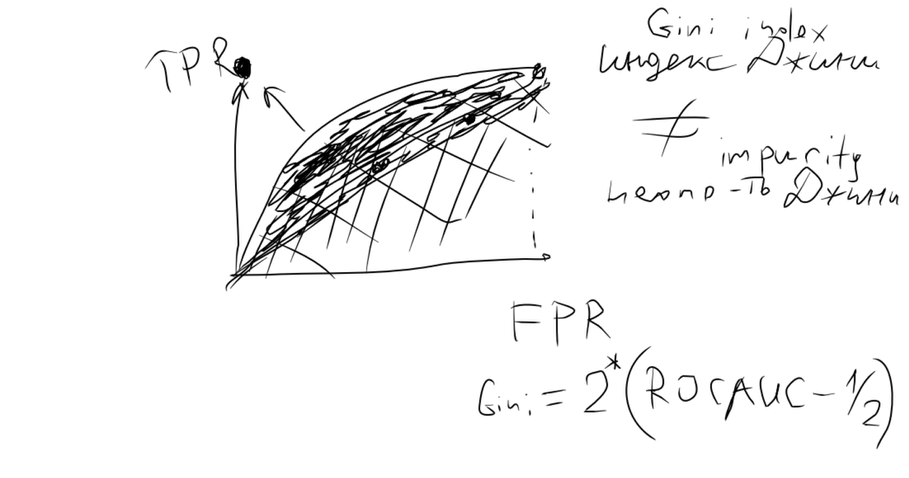
* діагональ між крайніми точками кривої ROC являє собою проміжок одинакових ймовірностей для помилкового та правдивого прогнозів

### Метрика Lift:

На практике часто возникают задачи, связанные с выбором подмножества: выделение лояльных клиентов банка, выделение уходящих пользователей мобильного
оператора и т.д. Заказчика может интересовать вопрос, насколько выгоднее работать
с этим подмножеством по сравнению со всем множеством. Если при рассылке предложений о кредите клиентам из подмножества и всем клиентам будет получаться
одна и та же доля откликнувшихся, то подмножество не будет представлять особой ценности. Формально это измеряется с помощью прироста концентрации (lift),
который равен отношению точности к доле положительных объектов в выборке:

$$lift = precision/((TP + FN)/ℓ)$$

Эту величину можно интерпретировать как улучшение доли положительных объектов в данном подмножестве относительно доли в случайно выбранном подмножестве
такого же размера.

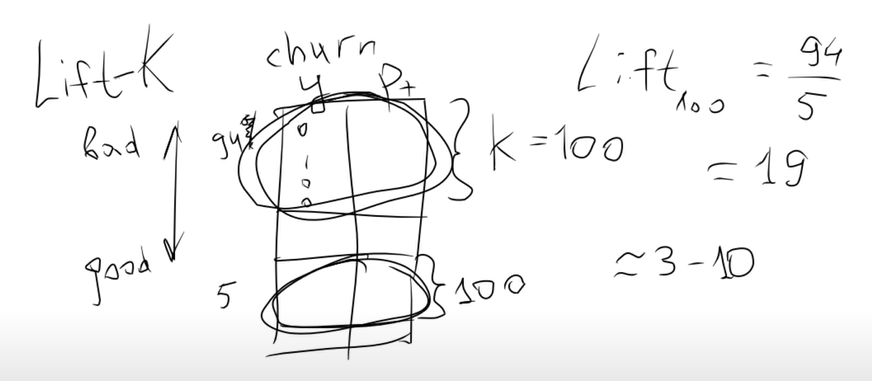

### Криві валідації як візуалізація підбору (через сітку) глибини моделі дерев:
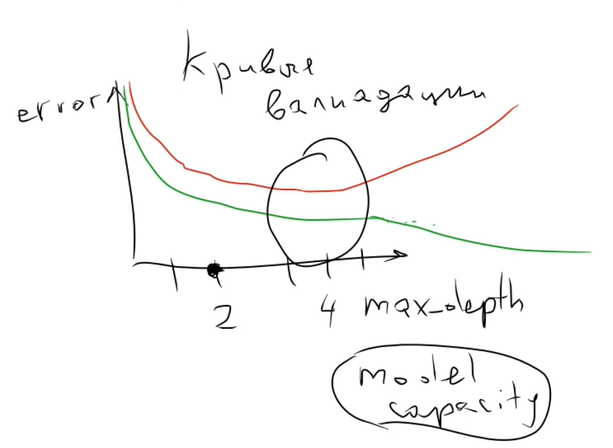
* Зелена крива відвовідає за навчальну вибірку, червона - за відкладену вибірку  (20%) для Крос-валідації.
* Центральна область є шуканою при переборі сітки 

Криві валідації при різних степенях навчання моделі:

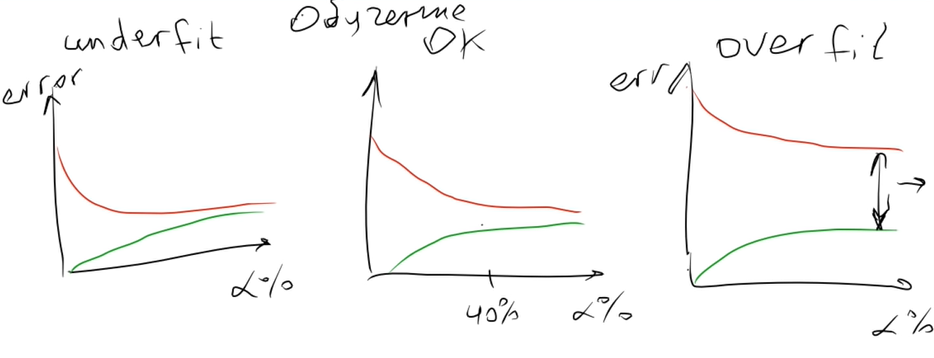


### Бутстрап вибірка - вибірка із заміщенням
Наугад береться кулька із вибрірки і повертається назад. Колір об'єктів формує нову (-і) вибірку (-и) IID:
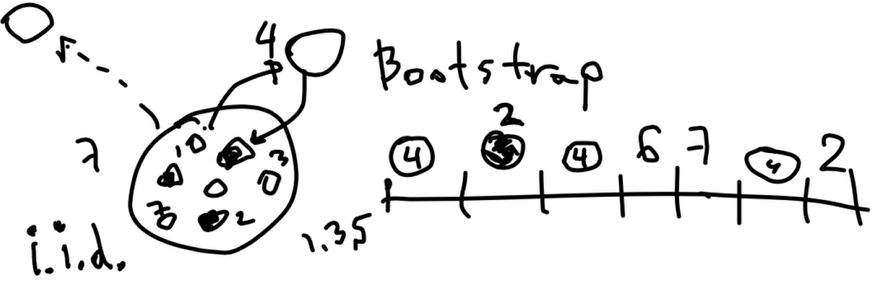

### Техніка побудови алгоритмів Bagging як агрегація голосів вибірки bootstrap
Ідея "мудрості натовпу" у задачах класифікації
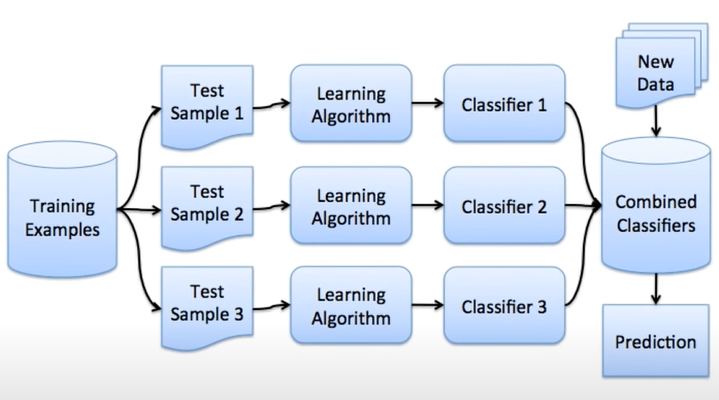

### Алгоритм випадкового лісу (узагльненої моделі bagging)
Алгоритм построения случайного леса, состоящего из $\large N$ деревьев, выглядит следующим образом:

Для каждого $\large n = 1, \dots, N$:
Сгенерировать выборку $\large X_n$ с помощью бутстрэпа;

Построить решающее дерево $\large b_n$ по выборке $\large X_n$:
* — по заданному критерию мы выбираем лучший признак, делаем разбиение в дереве по нему и так до исчерпания выборки
* — дерево строится, пока в каждом листе не более $\large n_\text{min}$ объектов или пока не достигнем определенной высоты дерева
* — при каждом разбиении сначала выбирается $\large m$ случайных признаков из $\large n$ исходных, и оптимальное разделение выборки ищется только среди них.

Итоговый классификатор $\large a(x) = \frac{1}{N}\sum_{i = 1}^N b_i(x)$, простыми словами — для задачи кассификации мы выбираем решение голосованием по большинству, а в задаче регрессии — средним.


Рекомендуется в задачах классификации брать $\large m = \sqrt{n}$, а в задачах регрессии — $\large m = \frac{n}{3}$, где $\large n$ — число признаков. Также рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту, а в задачах регрессии — пока в каждом листе не окажется по пять объектов.


Таким образом, случайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.


### Оцінка середнього відхиленя моделі
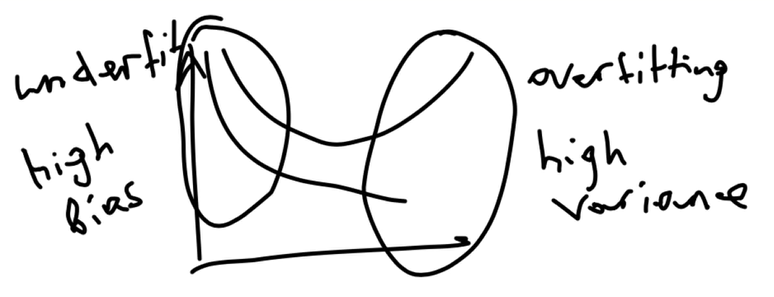

Поділ середнього відхиленя на квадратичне зміщення, дисперсію та неліквідну помилку:
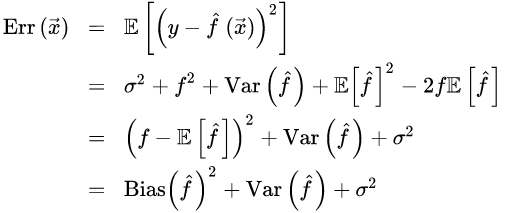

* bias - зміщення/обмеження за глибиною моделі вмпадкових дерев
* variance залежить від розкиду даних після незначних змін у вибірці -- явище перенавчання
* Випадковий ліс зменшує variance

### Зв'язок крос-валідації і моделі bagging
Вибірка навчальних даних на 63% від одної із розбитих, прогноз на відкладеній - 37%. Згодом - усереднення за отриманими прогнозами по усій вибірці (за аналогією до крос-валідації).
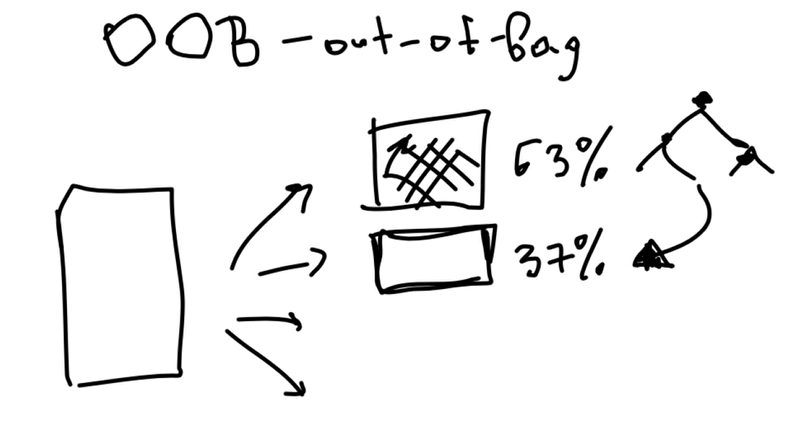

### Інтуіція перенавчених дерев
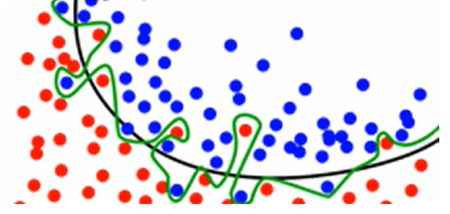
* Усереднений результат усіх дерев, що перенавчилися (зелений колір) може дати зглажену межу (чорний колір)
* Випадковий ліс не є чутливим до налаштування гіперпараметрів (глибини, кількості дерев та листь у кожному, ітд)
* У моделі випадковий лісу кожне дерево навчається паралельно, тому цей процес можна розпаралелити на різних машинах
* Проте, при великій кількості ознак (BOW) дерева губляться

### Корисні посилання:
https://habr.com/ru/company/ods/blog/336168/

https://habr.com/ru/company/ods/blog/328372/